<a href="https://colab.research.google.com/github/berlianm/Project-Based-Assignment---ML/blob/main/Project_Based_Assignemnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT BASED ASSIGNMENT**

**Berlian Muhammad G. A		(1301204378)**

**Bayu Surya Dharma S		  (1301204184)**

**Eric Nur Rahman		    	(1301200010)**

**Rachmat Fajrian N			  (1301204170)**

NIM TERKECIL = 1301200010 modulo 4 -> **Tugas Tipe 2**

---


Tugas regresi adalah tugas memprediksi tingkat kehematan bahan bakar kendaraan/MPG (miles per gallon: rataan jarak tempuh mobil dalam mil untuk setiap galon bahan bakar yang dikonsumsi) berdasarkan profil mobil yang diberikan yang diwakili oleh atribut-atribut seperti silinder, daya (tenaga kuda), tahun keluaran, dll. Dataset autos MPG beserta deskripsi atribut-atributnya bisa diakses di tautan berikut (login SSO):
https://drive.google.com/drive/folders/1HmKavcNCij76k02nCYQdP012cepM2nmz?usp=sharing

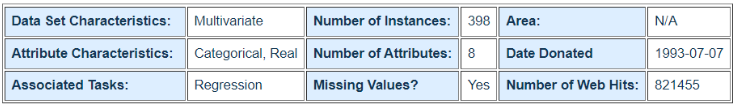

**KETERANGAN ATRIBUT**



```
MPG : MPG (miles per gallon) adalah satuan yang digunakan untuk menggambarkan tingkat kehematan bahan bakar suatu kendaraan.
continuous (target attribute)

Cylinders : Jumlah silinder pada mesin mobil.
multi-valued discrete

Displacement : Isi silinder pada mesin mobil (dalam satuan kubik inci).
continuous

Horsepower : Daya yang dihasilkan oleh mesin mobil (dalam satuan tenaga kuda).
continuous

Weight : Berat mobil (dalam satuan pound).
continuous

Acceleration : Kecepatan mobil dalam mencapai 60 mil per jam (dalam satuan detik).
continuous

Model year : Tahun pembuatan mobil.
multi-valued discrete

Origin : Asal mobil (dalam bentuk angka, dimana 1 menunjukkan asal Amerika Serikat, 2 menunjukkan asal Eropa, dan 3 menunjukkan asal Asia).
multi-valued discrete

Car name : Nama mobil.
string (unique for each instance)


```



# **Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import shapiro
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

import xgboost
from xgboost import XGBRegressor, plot_importance

from collections import Counter

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#import pack untuk ignoring warning
from warnings import filterwarnings
filterwarnings('ignore')

# **Ekplorasi Data**

In [ ]:
#Import Data dari github lalu diatur nama column yang sesuai dengan data
Dataset = pd.read_csv('https://github.com/berlianm/Project-Based-Assignment---ML/blob/main/autos_mpg.csv?raw=true')
Dataset.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
Dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
Dataset.shape

(398, 9)

In [ ]:
#Deskripsi dataset
Dataset.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
Dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Mendeteksi Missing Values dan Duplikasi Data 

In [ ]:
Dataset.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
Dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
Dataset.duplicated().sum()

0

In [ ]:
# Mengganti tipe data horsepower menjadi numeric agar missing values yang di horsepower bisa diolah
Dataset.replace({'?':np.nan},inplace=True)

Dataset['horsepower'] = pd.to_numeric(Dataset['horsepower'])
Dataset.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

#**Visualisasi Data**

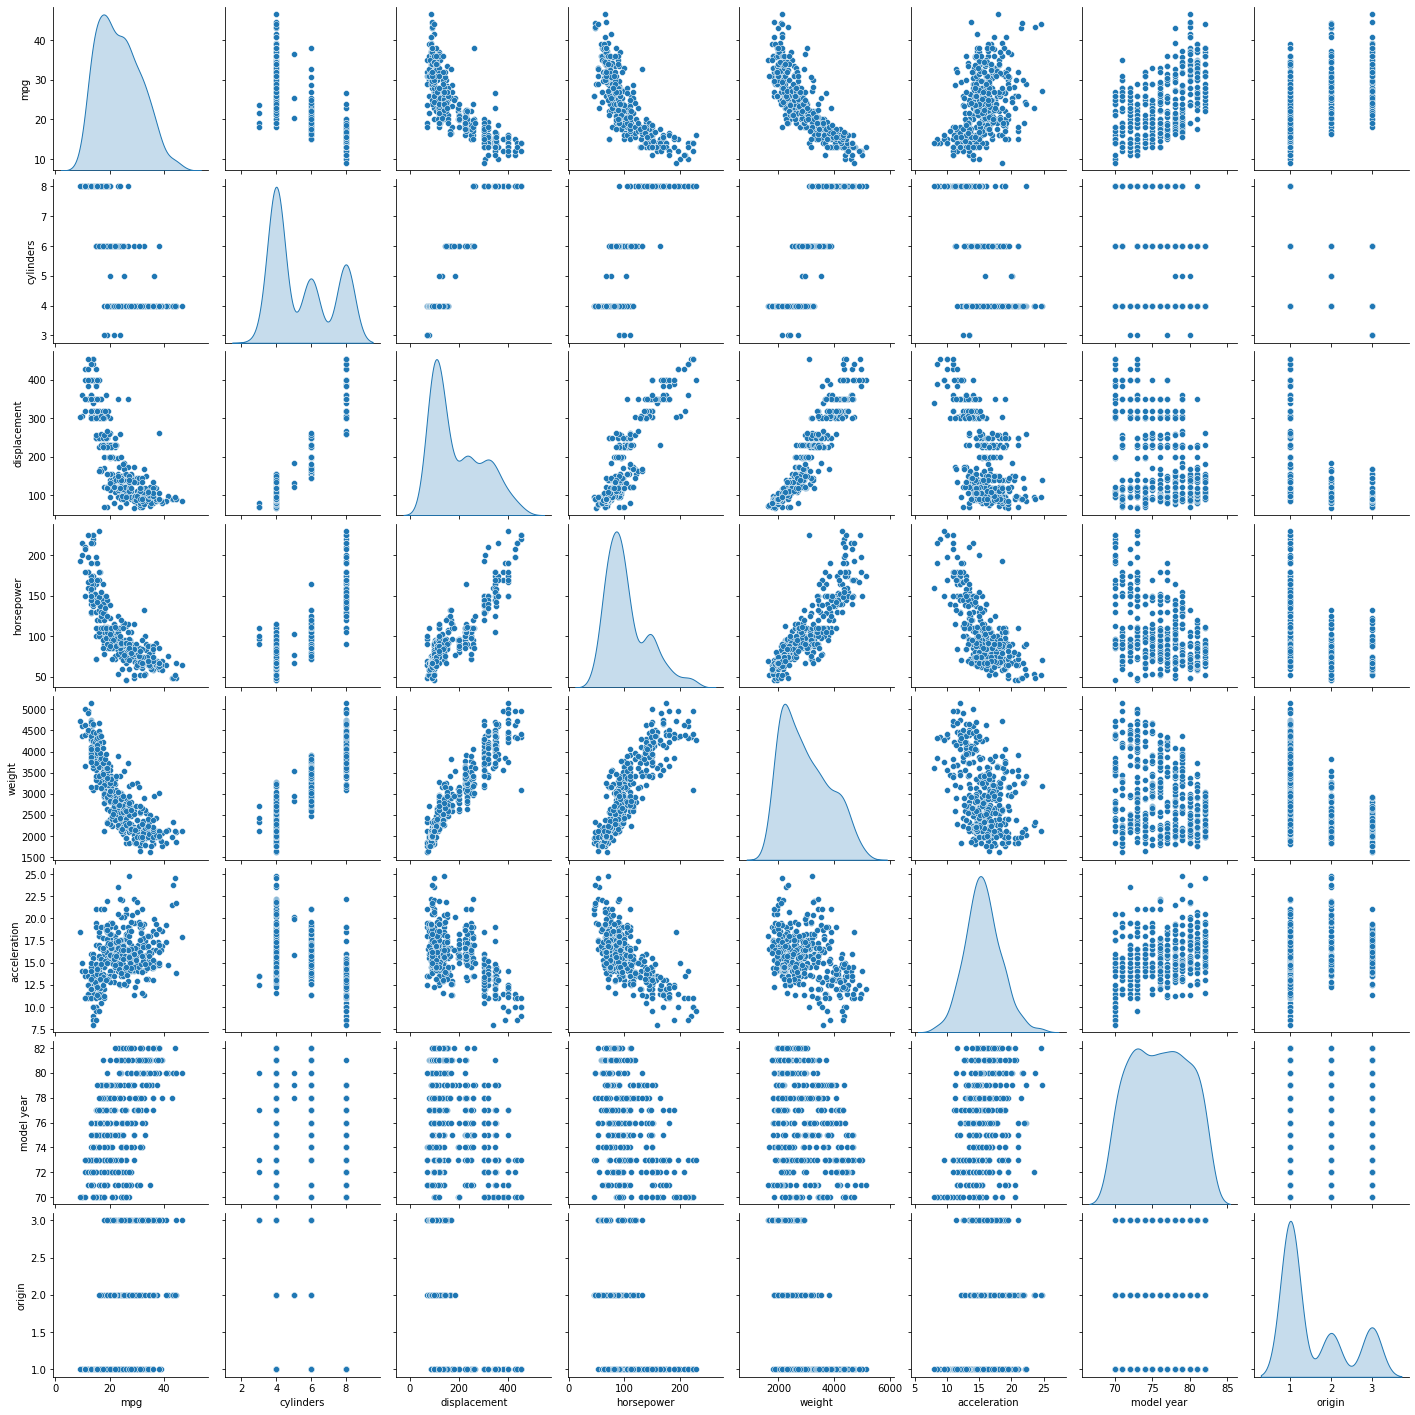

In [ ]:
# Visualisasi

sns.pairplot(data=Dataset,diag_kind='kde')
plt.show()

**Heat Map**

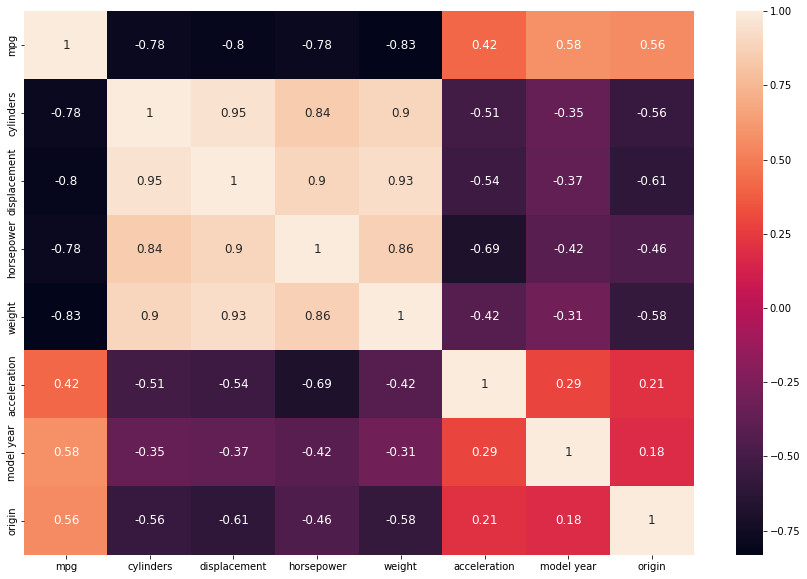

In [ ]:
# Menampilkan heat map dari dataset
plt.figure(figsize=(15,10))
sns.heatmap(Dataset.corr(),annot=True,annot_kws={"size":12}, color='purple')

**Korelasi**

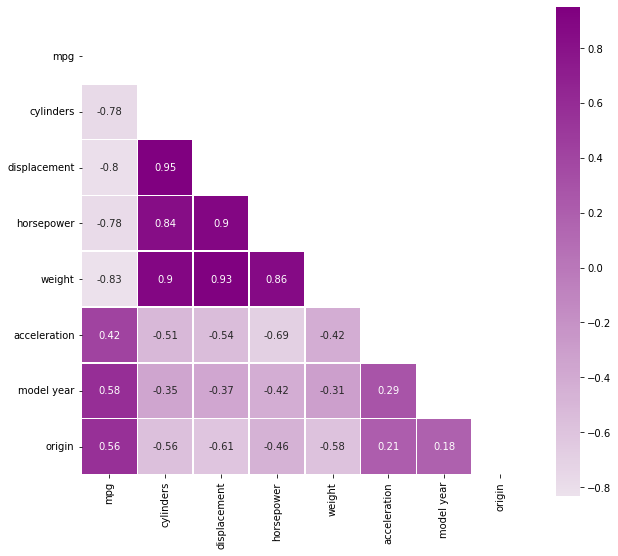

In [ ]:
# Korelasi

corr = Dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.light_palette('purple', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [ ]:
Dataset.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


**Histogram**

(array([13., 78., 73., 61., 54., 48., 38., 22.,  5.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

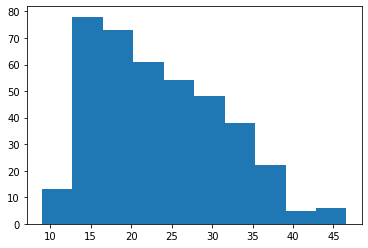

In [ ]:
# Menampilkan histogram untuk kolom 'mpg'
plt.hist(Dataset['mpg'],histtype='bar')

(array([  4.,   0., 204.,   0.,   3.,   0.,  84.,   0.,   0., 103.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

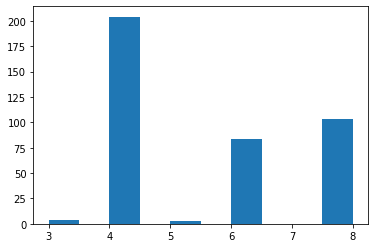

In [ ]:
# Menampilkan histogram untuk kolom 'cylinders'
plt.hist(Dataset['cylinders'],histtype='bar')

(array([107.,  89.,  31.,  13.,  57.,   3.,  42.,  31.,  16.,   9.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <a list of 10 Patch objects>)

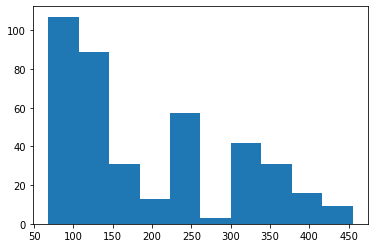

In [ ]:
# Menampilkan histogram untuk kolom 'displacement'
plt.hist(Dataset['displacement'],histtype='bar')

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

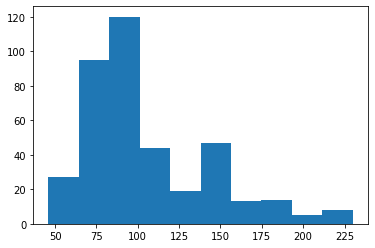

In [ ]:
# Menampilkan histogram untuk kolom 'horsepower'
plt.hist(Dataset['horsepower'],histtype='bar')

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <a list of 10 Patch objects>)

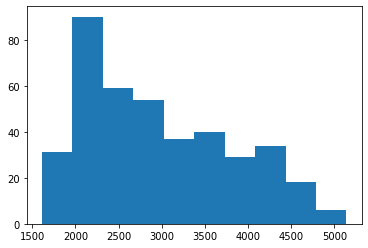

In [ ]:
# Menampilkan histogram untuk kolom 'weight'
plt.hist(Dataset['weight'],histtype='bar')

(array([ 6., 15., 50., 86., 92., 80., 45., 13.,  7.,  4.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <a list of 10 Patch objects>)

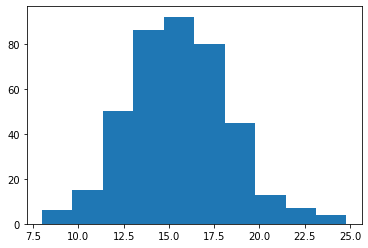

In [ ]:
# Menampilkan histogram untuk kolom 'acceleration'
plt.hist(Dataset['acceleration'],histtype='bar')

(array([57., 28., 40., 27., 30., 62., 36., 29., 29., 60.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <a list of 10 Patch objects>)

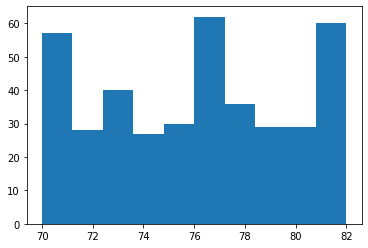

In [ ]:
# Menampilkan histogram untuk kolom 'model year'
plt.hist(Dataset['model year'],histtype='bar')

(array([249.,   0.,   0.,   0.,   0.,  70.,   0.,   0.,   0.,  79.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

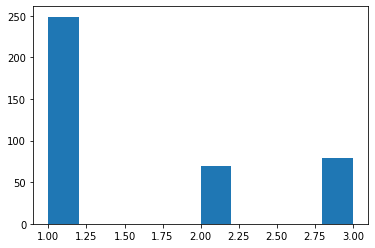

In [ ]:
# Menampilkan histogram untuk kolom 'origin'
plt.hist(Dataset['origin'],histtype='bar')

**Boxplot Outliers**

TypeError: ignored

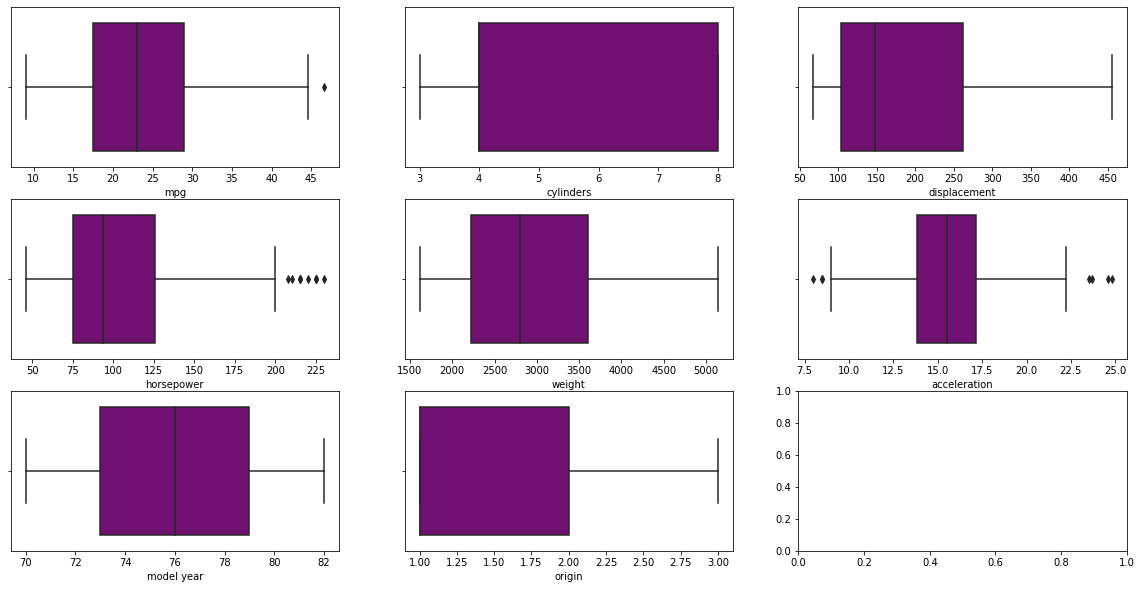

In [ ]:
# Boxplot Data Pencilan
# Kolom car name di drop karena data betipe object

fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(20, 10))

for variable, subplot in zip(Dataset.columns, ax.flatten()):
      sns.boxplot(Dataset[variable], ax = subplot, color='purple')
plt.show()

# **Pre-Processing Data**

In [ ]:
# Menentukan indeks baris dari dataframe yang berisi outliers pada setidaknya n kolom (fitur) dari data
def detect_outliers(df,n,features):
      # df       : dataframe yang akan dianalisis
      # n        : jumlah fitur (kolom) minimal yang harus memiliki nilai outlier pada baris yang sama agar baris tersebut dianggap sebagai baris yang berisi outlier
      # features : list nama fitur (kolom) yang akan dianalisis
      
    # Deklarasi list untuk outlier
    outlier_indices = []
    
    # Iterasi kolom
    for col in features:
        # Quartile 1 (25%)
        Q1 = np.percentile(df[col], 25)
        # Quartile 3 (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Jarak antara batas atas dan batas bawah
        j = 2 * IQR
        
        # Menentukan indeks baris (dimasukkan kedalam list)
        outlier_list_col = df[(df[col] < Q1 - j) | (df[col] > Q3 + j)].index
        
        # Menambahkan (meng-extend) indeks baris yang terdapat dalam list 'outlier_list_col' ke dalam list 'outlier_indices'
        outlier_indices.extend(outlier_list_col)
        
    # Menentukan indeks baris yang memiliki kemunculan lebih dari n kali
    outlier_indices = Counter(outlier_indices) # Menghitung kemunculan setiap elemen dalam suatu objek yang bersifat iterable

    # Menggunakan list comprehension untuk menyaring indeks baris yang memiliki kemunculan lebih dari n kali di dalam objek 
    # Disimpan pada variabel 'multiple_outliers'
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n ) 
    
    return multiple_outliers # Mengembalikkan nilai multiple_outliers

In [ ]:
# Menghapus baris-baris yang dianggap sebagai outlier
drop = detect_outliers(Dataset,0,['mpg','cylinders','displacement','horsepower','weight','acceleration'])

# Menghapus indeks baris yang telah dihapus sebelumnya dan menyetel ulang indeks baris yang tersisa
Dataset = Dataset.drop(drop, axis = 0).reset_index(drop=True)

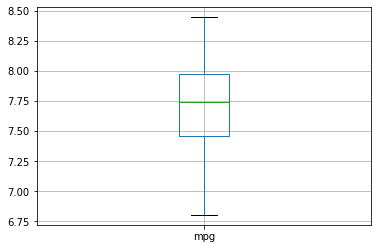

In [ ]:
# Menampilkan boxplot dari kolom 'mpg'
Dataset.boxplot(column=['mpg'])

**Converting Data**

In [ ]:
# Mengubah data kategorikal (data yang tidak dapat diukur secara numerik) menjadi bentuk numerik yang dapat diproses

Dataset['car make'] = Dataset['car name']
# Untuk memisahkan nama merek mobil dari nama mobil
Dataset['car make'] = Dataset['car name'].apply(lambda x: x.split()[0]) 

# Menghapus kolom 'nama mobil' dari dataframe Dataset
Dataset.drop(columns=['car name'],inplace=True)
# Menggantinya dengan fitur-fitur dummy 
Dataset = pd.get_dummies(Dataset,columns=['car make']) # Mengubah setiap fitur kategorikal yang ditentukan menjadi satu fitur dummy untuk setiap kategori unik dari fitur tersebut

# Mengubah nilai kolom 'mpg' dengan menggunakan logaritma natural
Dataset['mpg'] = np.log(1 + 100*Dataset['mpg']) # Logaritma natural bermanfaat untuk mengubah skala data yang terlalu besar atau kecil ke skala yang lebih mudah dibaca dan dianalisis
# EXAMPLE : Jika kolom 'mpg' memiliki nilai 10, maka logaritma natural dari 1 + 100 * 10 akan bernilai 2,3979

**Splitting Data** (Train - Test)

In [ ]:
# Memisahkan fitur-fitur dari dataframe Dataset 
x_no_log = Dataset.drop(columns=['mpg']) # x semua kolom tanpa mpg
y_no_log = Dataset['mpg']                # y hanya kolom mpg

# Mengisi missing values pada kolom 'horsepower' dengan nilai median dari kolom tersebut
imp = SimpleImputer(missing_values=np.nan,strategy='median') # np.nan dianggap sebagai missing value (not a number)
# Diubah menjadi bentuk array 2D
x_no_log['horsepower'] = imp.fit(x_no_log['horsepower'].values.reshape(-1, 1)).transform(x_no_log['horsepower'].values.reshape(-1, 1))

In [ ]:
Dataset.shape

(396, 45)

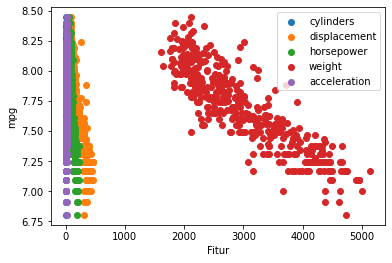

In [ ]:
# Visualisasi
import matplotlib.pyplot as plt

# Memvisualisasikan data dengan scatterplot
# plt.scatter(x_no_log['mpg'], y_no_log, label='mpg')
plt.scatter(x_no_log['cylinders'], y_no_log, label='cylinders')
plt.scatter(x_no_log['displacement'], y_no_log, label='displacement')
plt.scatter(x_no_log['horsepower'], y_no_log, label='horsepower')
plt.scatter(x_no_log['weight'], y_no_log, label='weight')
plt.scatter(x_no_log['acceleration'], y_no_log, label='acceleration')
# plt.scatter(x_no_log['model year'], y_no_log, label='model year')
# lt.scatter(x_no_log['origin'], y_no_log, label='origin')
# dst

# Menambahkan label pada sumbu x dan y
plt.xlabel('Fitur')
plt.ylabel('mpg')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


**Membuat Data Testing - Training**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_no_log, y_no_log, test_size=0.3, random_state=42)



---



# **Modeling**



---



# **Linear Regression**

**XGBoost** (eXtreme Gradient Boosting) adalah sebuah algoritma pembelajaran mesin yang banyak digunakan untuk masalah pemodelan prediksi. Algoritma ini merupakan salah satu implementasi dari teknik boosting, yaitu sebuah metode untuk memperbaiki akurasi model dengan cara menggabungkan beberapa model yang lemah menjadi satu model yang lebih kuat.

**Membuat instance RandomForest dan XGBoost**

In [ ]:
# Membuat objek model regresi
rf = RandomForestRegressor()
xgbr = XGBRegressor()

**Pemilihan Hyperparameter Model Regresi dengan Algoritma Random Forest**

In [ ]:
# Membuat grid parameter yang akan digunakan dalam proses pemilihan hyperparameter model regresi
rf_param_grid = {"max_depth": [None],           # profunditas maksimal pohon
              "max_features": [5, 10, 20],      # jumlah fitur terbaik yang akan dipilih secara acak untuk membagi node
              "min_samples_split": [2, 3, 10],  # jumlah sampel minimum yang diperlukan untuk membagi node
              "min_samples_leaf": [1, 3, 10],   # jumlah sampel minimum yang diperlukan pada setiap leaf node
              "bootstrap": [False],             # bootstrapping akan digunakan dalam proses pelatihan model
              "n_estimators" :[100,300]}        # jumlah pohon yang akan dibuat dalam model

In [ ]:
# Melakukan proses pemilihan hyperparameter model regresi dengan menggunakan algoritma Random Forest dan teknik cross-validation

# Menentukan jumlah fold yang akan digunakan dalam proses cross-validation
kfold = KFold(n_splits=10)
# Menentukan objek model yang akan digunakan
gsRFC_all = GridSearchCV(rf,param_grid = rf_param_grid, cv=7, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
# Memasukkan data training x ke target y
gsRFC_all.fit(xtrain, ytrain)

# Menyimpan model regresi dengan hyperparameter terbaik
RandForest_best = gsRFC_all.best_estimator_

# Mengembalikan nilai scoring metric terbaik yang dihasilkan dari proses pemilihan hyperparameter
gsRFC_all.best_score_

Fitting 7 folds for each of 54 candidates, totalling 378 fits


-0.012389678148607437

**Pemilihan Hyperparameter Model Regresi dengan Algoritma Boosting**

In [ ]:
# Pemilihan hyperparameter model regresi dengan menggunakan algoritma XGBoost
xgb_params = {'nthread':[4],                      # jumlah thread yang akan digunakan dalam proses pelatihan model
              'learning_rate': [.03, 0.05, .07],  # tingkat pembelajaran model
              'max_depth': [5, 6, 7],             # profunditas maksimal pohon
              'min_child_weight': [4],            # bobot minimum yang diperlukan pada setiap child node
              'subsample': [0.7],                 # prosentase sampel yang akan digunakan dari setiap iterasi
              'colsample_bytree': [0.7],          # prosentase fitur yang akan digunakan dari setiap iterasi
              'n_estimators': [500,1000]}         # jumlah pohon yang akan dibuat dalam model

In [ ]:
# Melakukan proses pemilihan hyperparameter model regresi dengan menggunakan algoritma XGBoost dan teknik cross-validation
gsXGB = GridSearchCV(xgbr, xgb_params, cv = 7, scoring='neg_mean_squared_error', 
                     refit=True, n_jobs = 5, verbose=True)
# Mengakses model dengan hyperparameter terbaik yang dihasilkan
gsXGB.fit(xtrain,ytrain)
# Menyimpan model dengan hyperparameter terbaik
XGB_best = gsXGB.best_estimator_

# Mengakses nilai scoring metric terbaik
gsXGB.best_score_

Fitting 7 folds for each of 18 candidates, totalling 126 fits
[00:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


-0.011374868999440336

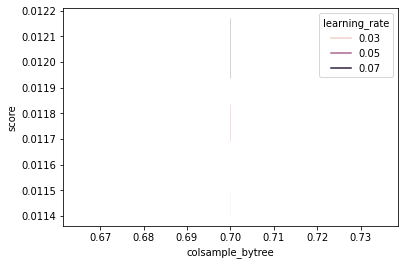

In [ ]:
import seaborn as sns

# Mengakses nilai scoring metric terbaik untuk setiap kombinasi hyperparameter yang diuji
scores = gsXGB.cv_results_['mean_test_score']
# Mengakses nama hyperparameter yang diuji
param_names = list(gsXGB.cv_results_['params'][0].keys())
# Mengubah nilai scoring metric terbaik menjadi nilai positif
scores = -scores

# Membuat dataframe yang berisi informasi nilai scoring metric terbaik dan hyperparameter yang diuji
df_scores = pd.DataFrame({param_names[0]: gsXGB.cv_results_['param_' + param_names[0]],
                         param_names[1]: gsXGB.cv_results_['param_' + param_names[1]],
                         'score': scores})

# Memvisualisasikan hasil pencarian hyperparameter dengan menggunakan lineplot
sns.lineplot(x=param_names[0], y='score', hue=param_names[1], data=df_scores)

**Proses Prediksi**

In [ ]:
# menggunakan model untuk melakukan prediksi dengan menggunakan method predict dengan memasukkan data yang akan diprediksi
ypred = XGB_best.predict(xtest)

# Mengevaluasi akurasi model dengan menggunakan beberapa metric 
# Memasukkan target ytest dengan hasil prediksi ypred
mean_absolute_error(ytest, ypred)               # Mengukur rata-rata error absolut yang dihasilkan dari model
explained_variance_score(ytest, ypred)          # Mengukur seberapa baik model dapat menjelaskan variasi dari target yang sebenarnya
mean_squared_error(ytest, ypred, squared=True)  # Mengukur rata-rata error kuadrat yang dihasilkan dari model

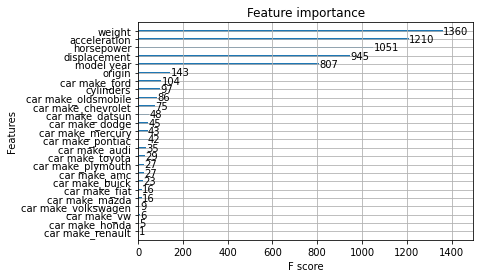

In [ ]:
# Visualisasi Importance dari semua fitur
plot_importance(XGB_best)

In [ ]:
# Melakukan evaluasi terhadap model regresi yang telah dibangun dengan menggunakan algoritma Random Forest
ypred_alt = RandForest_best.predict(xtest)       
explained_variance_score(ypred_alt,ytest)        # Menghitung seberapa baik variasi dari label yang sebenarnya dapat dijelaskan oleh prediksi model
mean_absolute_error(ytest,ypred_alt)             # Menghitung nilai rata-rata error absolut yang terjadi antara label yang sebenarnya dengan prediksi model
mean_squared_error(ytest,ypred_alt,squared=True) # Menghitung nilai rata-rata error kuadrat yang terjadi antara label yang sebenarnya dengan prediksi model

0.011843664214965736

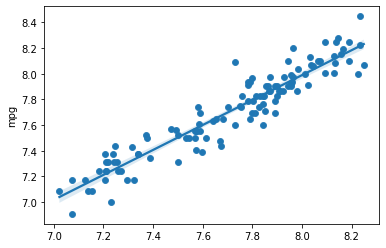

In [ ]:
# Visualisasi
import seaborn as sns

# Membuat scatterplot dengan label sebagai sumbu y-axis dan hasil prediksi sebagai sumbu x-axis
sns.scatterplot(x=ypred_alt, y=ytest)

# Menambahkan garis regresi ke dalam scatterplot
sns.regplot(x=ypred_alt, y=ytest)

# **Mengimplementasi Neural Network ke Dalam Train Dataset 'mpg' untuk Prediksi**

Proses Linear Regression dengan Neural Network bertujuan untuk membandingkan akurasi metode regresi linear dan backpropagation dalam prediksi nilai

In [ ]:
# Importing Library
import torch
from torch import nn

In [ ]:
# Menentukan dimensi 
n_input_dim = xtrain.shape[1]

# Ukuran layer
n_hidden = 4 # Jumlah hidden layer
n_output = 1 # Jumlah output untuk memprediksi 'mpg'

# Membangun model
torch_model = torch.nn.Sequential(
    # n_input_dim memiliki jumlah node sesuai dengan jumlah fitur pada data yang akan digunakan untuk melatih model
    # n_hidden menentukan jumlah node menggunakan fungsi ELU
    torch.nn.Linear(n_input_dim, n_hidden), 
    # Menentukan output dari suatu neuron berdasarkan input yang diberikan
    torch.nn.ELU(),
    torch.nn.Linear(n_hidden, n_output)
)
# Mencetak struktur model 
print(torch_model)

Sequential(
  (0): Linear(in_features=44, out_features=4, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=4, out_features=1, bias=True)
)


**Mean Squared Error Loss**

In [ ]:
# Membuat Mean Squared Error Loss (MSELoss) dengan tingkat pembelajaran (learning rate) sebesar 0.01
loss_func = torch.nn.MSELoss()
learning_rate = 0.01

# Melakukan optimisasi dengan menggunakan Algoritma optimizer 'Adam' dan diinisialisasi dengan menggunakan loss function dan learning rate
# Untuk memperbaiki model dengan cara menyesuaikan nilai-nilai dari parameter-parameter yang ada pada model sesuai dengan data yang tersedia
optimizer = torch.optim.Adam(torch_model.parameters(), lr=learning_rate)

**Pengoptimalan Model**

In [ ]:
train_error = []    # Menyimpan error training pada setiap epoch.
iterasi = 600       # Jumlah epoch yang akan dilakukan

# Mengubah nilai tensor menjadi bentuk matriks satu kolom
Y_train_t = torch.FloatTensor(ytrain.values).reshape(-1,1) 

**Proses Training**

Text(0.5, 1.0, 'Training Loss')

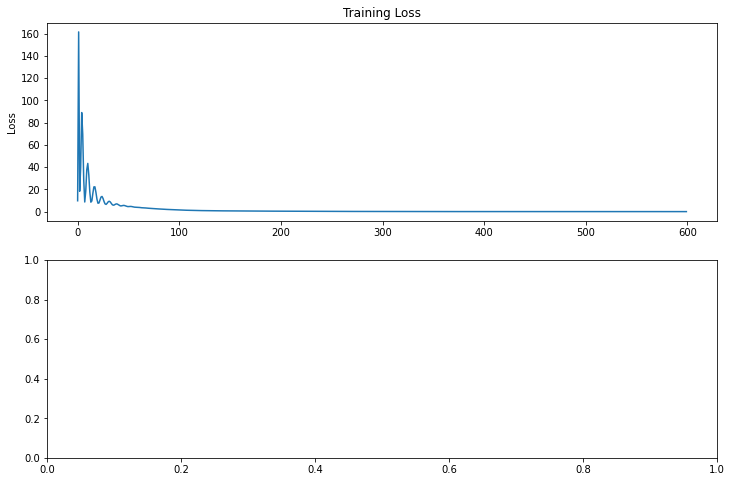

In [ ]:
# Melakukan proses training
for i in range(iterasi): # Proses pelatihan model dilakukan dengan mengulangi sebanyak 600 kali
    X_train_t = torch.FloatTensor(xtrain.values) 
    y_hat = torch_model(X_train_t)
    loss = loss_func(y_hat, Y_train_t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    train_error.append(loss.item()) # Menyimpan nilai loss dari setiap iterasi

# Visualisasi Training Loss
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_error)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

**Pembuatan Model**

In [ ]:
# Didefinisikan sebuah model regresi dengan jumlah input sesuai dengan jumlah fitur (kolom) pada data
X_test_t = torch.FloatTensor(xtest.values)

# Melakukan prediksi pada data testing dengan menggunakan fungsi forward propagation 
ypredict = torch_model(X_test_t)

# Menghitung mean squared error antara nilai prediksi dan nilai aktual pada data testing
mean_squared_error(ytest,ypredict.detach().numpy(),squared=True)

0.05888699162907735

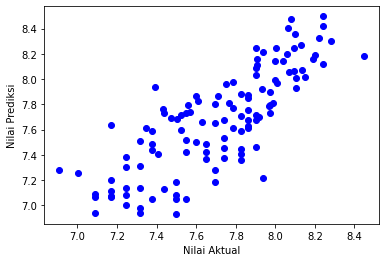

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan plot garis sederhana yang menggambarkan perbandingan antara nilai aktual pada data testing dengan nilai prediksi
plt.plot(ytest, ypredict.detach().numpy(), 'bo')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()

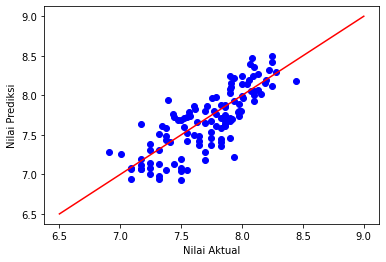

In [ ]:
import matplotlib.pyplot as plt

# Menampilkan plot garis sederhana yang menggambarkan perbandingan antara nilai aktual pada data testing dengan nilai prediksi
plt.plot(ytest, ypredict.detach().numpy(), 'bo')
plt.plot([6.5, 9], [6.5, 9], 'r-')

plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()